ML PROJECT 
PREDICTING STUDENTS DROPOUT AND ACADEMIC SUCCESS
In this project we are going to learn what aspect of the students life effects more on their studies. To prepare the dataset for analysis, we will initially install specific Python packages including numpy, pandas, seaborn, and matplotlib for data processing and analysis. For machine learning model, we will install Extreme Gradient Boosting (XGB) library and use binary logistics.

Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

Reading the dataset

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
#shows first five rows of dataset
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
#shows last five rows of datset
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [7]:
#shows sample of dataset
df.sample()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
840,1,1,1,9,1,1,14,3,3,10,...,0,5,5,0,0.0,0,8.9,1.4,3.51,Dropout


In [8]:
#shows the number of rows and columns
df.shape

(4424, 35)

In [9]:
df.size

154840

In [10]:
#info shows all the information of the dataset i.e. how many rows and columns are present in the dataset and the datatypes
#of the them,if there are any missing or null values present we get to know all of this from df.info() 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [11]:
#describe shows the statistical structure of the dataset,we get to see the mean,standard value
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
#shows null values in the dataset
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [13]:
#this will show if there are any duplicate values present in the dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

There are no null and duplicated values in the data.

Data Visualisation(EDA)

Since most of the variables in the data set are categorical, we will mainly use bar graphs to visualize them. However, for variables that are discrete or continuous, we will use distribution plots to display their distribution. Additionally, we will utilize correlation heatmaps to examine the relationships between variables in the data.

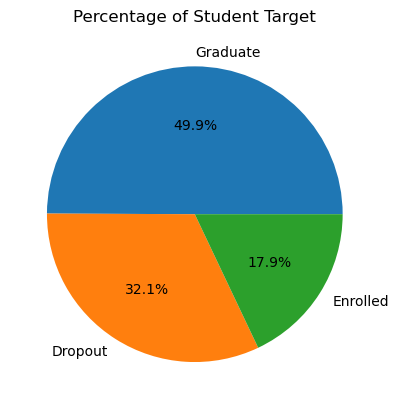

In [14]:
student_target=df['Target'].value_counts()
plt.pie(student_target,labels=student_target.index,autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

Approximately 50% of students in the data have graduated.

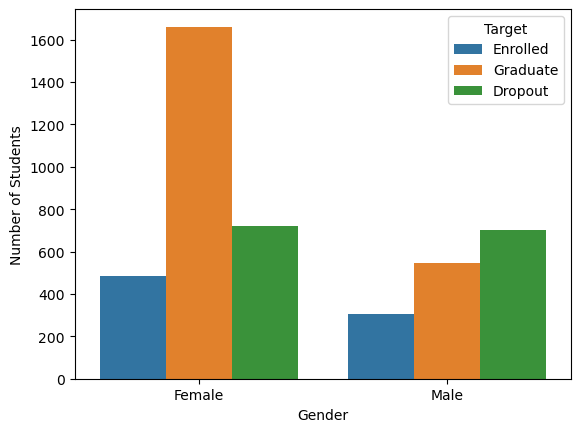

In [15]:
sns.countplot(data=df,x='Gender',hue='Target',hue_order=['Enrolled','Graduate','Dropout'])
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

According to the data, a higher number of graduates are female. However, females also have the highest number of dropouts, although the difference compared to males is small.

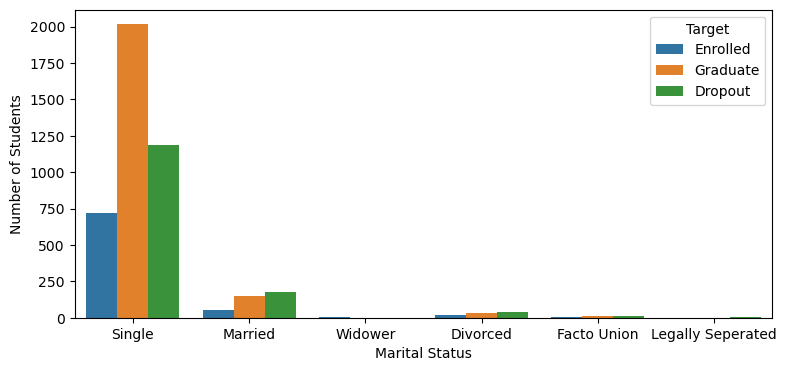

In [16]:
plt.figure(figsize=(9,4))
sns.countplot(data=df,x='Marital status',hue='Target',hue_order=['Enrolled','Graduate','Dropout'])
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

Regarding marital status, the majority of both graduates and dropouts are single.

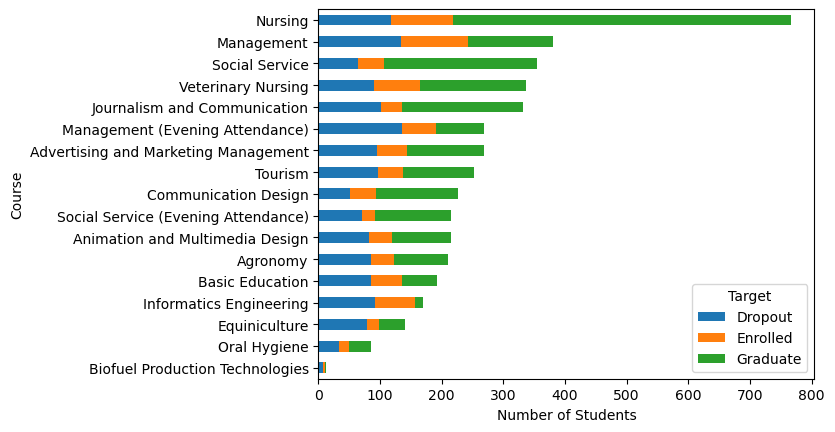

In [17]:
student_course=df.groupby(['Course','Target']).size().reset_index().pivot(columns='Target',index='Course',values=0)

# Rename the index of the DataFrame
student_course=student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})
student_course_total=student_course.sum(axis=1)
student_course_sorted=student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh',stacked=True)
plt.xlabel('Number of Students')
plt.show()

Nursing course produced the highest number of graduates while management course has the highest number of dropouts.

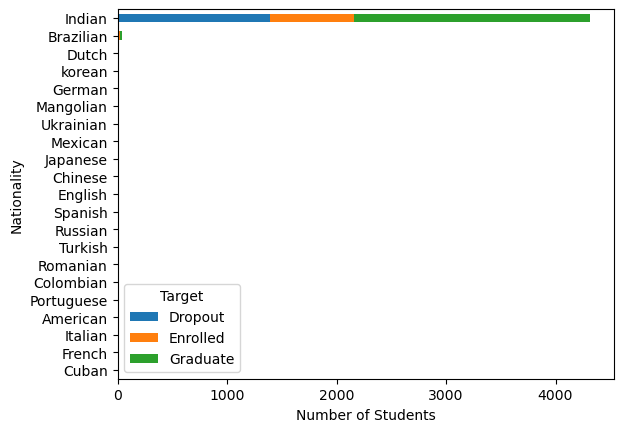

In [18]:
nationality=df.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target',index='Nacionality',values=0)

# Rename the index of the DataFrame
nationality=nationality.rename(index={1:'Indian',2:'Chinese',3:'korean',4:'Japanese',5:'French',6:'Italian',7:'American',8:'English',9:'German',10:'Mangolian',11:'Spanish',12:'Dutch',13:'Portuguese',14:'Brazilian',15:'Russian',16:'Mexican',17:'Turkish',18:'Ukrainian',19:'Romanian',20:'Colombian',21:'Cuban'})
nationality_total=nationality.sum(axis=1)
nationality_sorted=nationality_total.sort_values(ascending=True)
nationality.loc[nationality_sorted.index].plot(kind='barh', stacked=True)
plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()

The plot shows that the majority of the students in the dataset are Indian, which accounts for the highest frequency among all the nationalities.

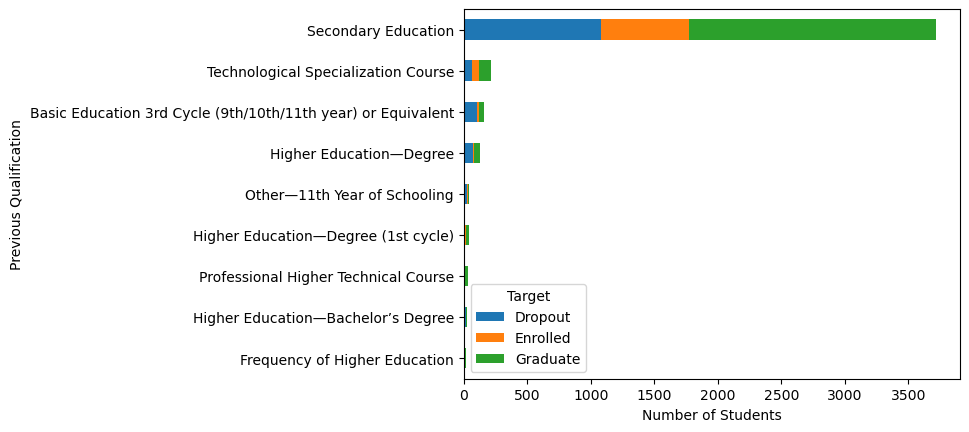

In [19]:
student_prequal=df.groupby(['Previous qualification','Target']).size().reset_index().pivot(columns='Target',index='Previous qualification',values=0)

# Rename the index of the DataFrame
student_prequal=student_prequal.rename(index={1:'Secondary Education',2:'Higher Education—Bachelor’s Degree',3:'Higher Education—Degree',4:'Higher Education—Master’s Degree',5:'Higher Education—Doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—Not Completed',8:'11th Year of Schooling—Not Completed',9:'Other—11th Year of Schooling',10:'10th Year of Schooling',
                                              11:'10th Year of Schooling—Not Completed',12:'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent',13:'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent',14:'Technological Specialization Course',15:'Higher Education—Degree (1st cycle)',16:'Professional Higher Technical Course',17:'Higher Education—Master’s Degree (2nd Cycle)'})
student_prequal_total=student_prequal.sum(axis=1)
student_prequal_sorted=student_prequal_total.sort_values(ascending=True)
student_prequal_top=student_prequal_sorted[8:]
student_prequal.loc[student_prequal_top.index].plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()

Most of the students in the data finished secondary education.

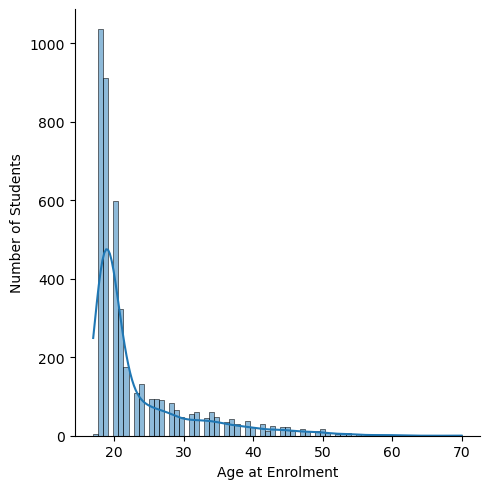

In [20]:
sns.displot(data=df,x='Age at enrollment',kde=True)
df['Age at enrollment'].describe()
plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

The distribution of age at enrolment is positively skewed, indicating that the majority of students enrolled at a relatively young age. The mean age at enrolment is approximately 23 years old, with the most frequent age range falling between 19 to 25 years old.

The below graphs are to see the father's and mother's occupation

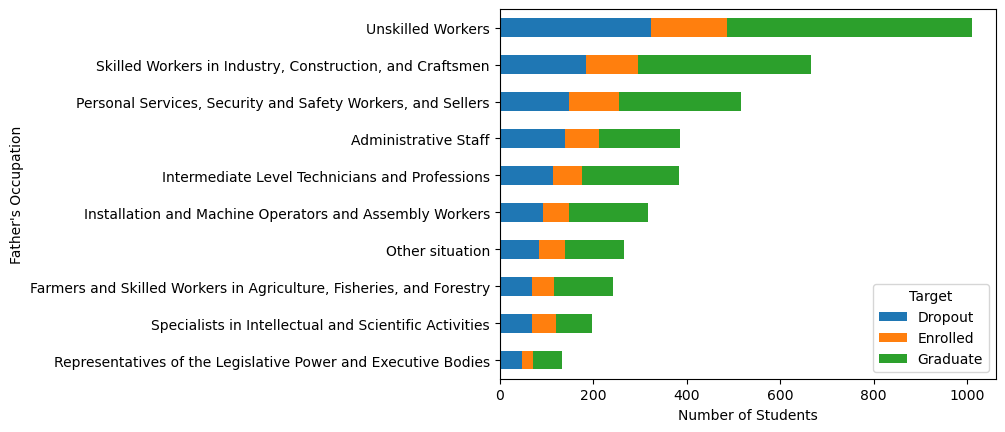

In [21]:
student_foccupation=df.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target',index="Father's occupation",values=0)
student_foccupation=student_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',
                                                      7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Other situation'})
student_foccupation_total=student_foccupation.sum(axis=1)
student_foccupation_sorted=student_foccupation_total.sort_values(ascending=True)
student_foccupation_top10=student_foccupation_sorted[36:]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True)
plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.show()

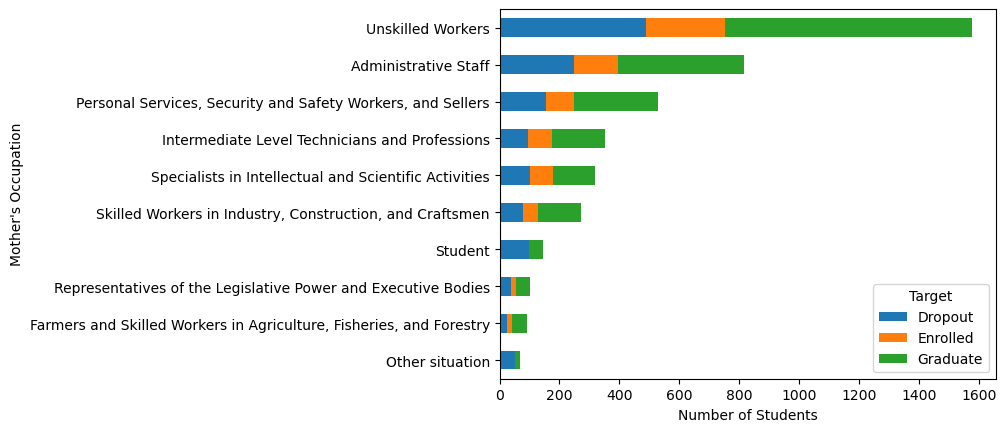

In [22]:
student_moccupation=df.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)
student_moccupation=student_moccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other situation'})
student_moccupation_total = student_moccupation.sum(axis=1)
student_moccupation_sorted = student_moccupation_total.sort_values(ascending=True)
student_moccupation_top10 = student_moccupation_sorted[22:]
student_moccupation.loc[student_moccupation_top10.index].plot(kind='barh', stacked=True)
plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.show()

Highest number of students who graduated and dropped out have parents who are unskilled workers.

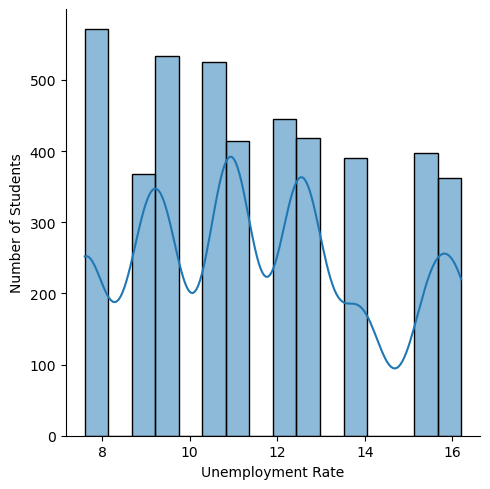

In [23]:
sns.displot(data=df,x="Unemployment rate",kde=True)
df['Unemployment rate'].describe()
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()

The majority of the data points in the unemployment rate distribution fall within the range of 9 to 13.

Correlation and Correlation Heatmap

In [24]:
corr=df.corr()
corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.040255,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.060483,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.018276,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.026203,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.003293,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.017785,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.012569,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880


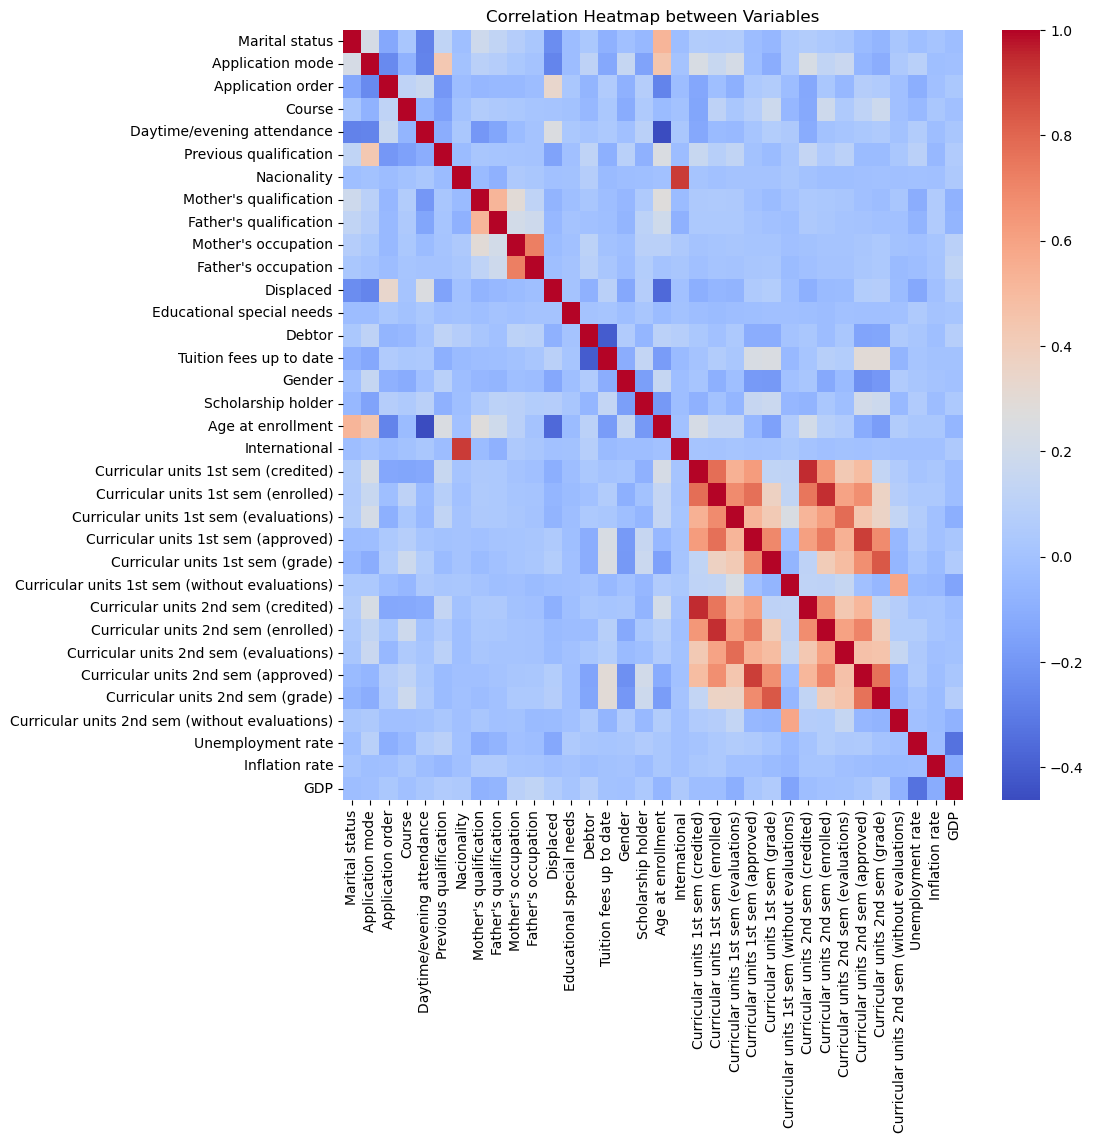

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

Correlation between features are low except for Nationality and International. Hence, we can dropped these features in the regression model for predicting student target.

Preprocessing the Data

To predict students' academic success and dropout, we will use logistic regression to determine the target variable using the feature variables.Since the target data contains students who are still enrolled, we will drop them from the dataset and use the data for student who dropped out and graduated. 

In [26]:
df=df.drop(df[df['Target']=='Enrolled'].index)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Converting Target Variable into Numeric Form
We will transform the target variable into numeric form using label encoder,a data preprocessing feature from SciKit library.The labels dropout and graduate become 0 and 1, respectively.

In [27]:
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


Splitting data into x and y
We set x and y as the dataframe feature and target variables, respectively. Note that we will drop the Nationality and International columns since they are highly correlated and only one nationality i.e Indian significantly dominates the data. This will prevent bias in the statistical regression.

In [28]:
x=df.drop(columns=['Nacionality','International','Target'],axis=1)
y=df['Target']

In [29]:
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,3,4,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,22,27,10,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,23,27,6,4,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,22,28,10,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [30]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int32

Splitting Data into Training and Testing Data
To begin with the logistic regression as our machine learning model, we split the data into training and testing data. 80% of the data will be our training model and rest 20% will be the testing model. We choose the third state of the random sampling.

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [32]:
print(x.shape,xtrain.shape,xtest.shape)

(3630, 32) (2904, 32) (726, 32)


Model Building

Logistic regression will now be implemented using Extreme Gradient Boosting (XGBoost) which is one of the available open source libraries used for regression models. In this case, binary logistic is set for our model with 1000 n_estimators. The n_estimators serves as the number of decision trees or classification considering the data from feature variables.

In [33]:
bin_log=xgb.XGBClassifier(objective='binary:logistic',n_estimators=1000)
bin_log.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Data Prediction and Evaluation of the Model
We now set the logistic regression model to the training data.

In [34]:
target_prediction=bin_log.predict(xtest)
print(target_prediction)

[1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 

In [35]:
data_accuracy=accuracy_score(ytest,target_prediction)
print("Accuracy:",data_accuracy)

Accuracy: 0.9008264462809917


Conclusion
From the analysis we can conclude,the Extreme Gradient Boosting (XGB) gives the accuracy of 90%.Therefore by using this model we can classify whether the student will graduate or dropout

Crosschecking the value predicted by the model with the value present in data

In [36]:
df.iloc[192]

Marital status                                     1.00
Application mode                                   1.00
Application order                                  2.00
Course                                            14.00
Daytime/evening attendance                         1.00
Previous qualification                             1.00
Nacionality                                        1.00
Mother's qualification                             1.00
Father's qualification                             3.00
Mother's occupation                                5.00
Father's occupation                                4.00
Displaced                                          0.00
Educational special needs                          0.00
Debtor                                             0.00
Tuition fees up to date                            1.00
Gender                                             0.00
Scholarship holder                                 0.00
Age at enrollment                               

In [37]:
input_data=(1,1,2,14,1,1,1,3,5,4,0,0,0,1,0,0,19,0,5,5,5,13,0,0,5,5,5,13.2,0,9.4,-0.8,-3.12) 
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=bin_log.predict(input_data_reshaped)
print('Prediction:',prediction)
#print("The initial value is ",prediction[0])

Prediction: [1]


As seen above the model has predicted the same value present in the dataset.

Forecasting with unknown data

In [38]:
input_data=(1,1,1,9,1,1,22,1,10,11,0,0,0,1,0,0,21,0,5,12,3,12,0,0,5,12,1,15,3,16,0,-0) 
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=bin_log.predict(input_data_reshaped)
print('Prediction:',prediction)

Prediction: [0]
